### Segmentação de Clientes - Clustering

 A segmentação de clientes é a subdivisão de um mercado em grupos de clientes distintos que compartilham características semelhantes

As formas mais comuns de segmentar os dados são:

1. **Informações demográficas** , como sexo, idade, estado familiar e conjugal, renda, escolaridade e ocupação.
2. **Informações geográficas** , que variam conforme a abrangência da empresa. Para empresas localizadas, essas informações podem pertencer a cidades ou condados específicos. Para empresas maiores, pode significar a cidade, estado ou até mesmo país de residência do cliente.
3. **Psicografia** , como classe social, estilo de vida e traços de personalidade.
4. **Dados comportamentais** , como gastos e hábitos de consumo, uso de produto / serviço e benefícios desejados.

**Vantages da segmentação**

1. Determine o preço apropriado do produto.
2. Desenvolva campanhas de marketing personalizadas.
3. Projete uma estratégia de distribuição ideal.
4. Escolha recursos específicos do produto para implantação.
5. Priorize os esforços de desenvolvimento de novos produtos

### **K Means Clustering Algorithm** 

1. Especifique o numero de clusters. -> K

2. Inicialize os centróides. Embaralhando o DataSet e depois selecionando aleatooriamente os pontos de dados para K. 

3. O objetivo do algoritmo é agrupar os dados que mais se aproximam dos centroides, e depois de agrupados ele realoca o centroide no meio desse conjunto de dados.

4. Continue Iterando o algoritmo até que não haja nenhuma alteração nos centtróides. Sendo assim não será atribuido nenhum outro dado ao cluster. 

**Environment and tools**
1. scikit-learn
2. seaborn
3. numpy
4. pandas
5. matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Store_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Eu abandonei a coluna id porque não parece relevante para o contexto. Também plotei a frequência de idade dos clientes.

In [4]:
df.drop(['CustomerID'], axis=1, inplace=True)

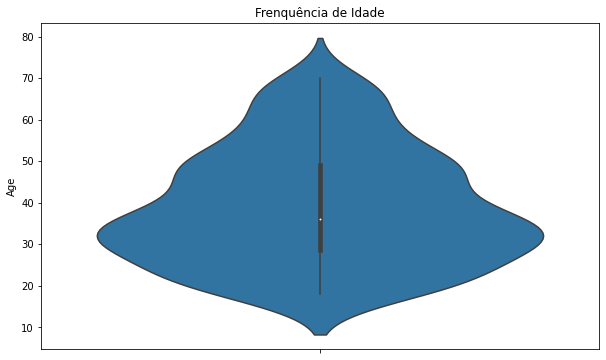

In [5]:
plt.figure(figsize=(10,6))
plt.title("Frenquência de Idade")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

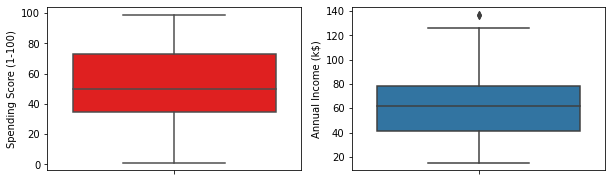

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Fiz um gráfico de barras para verificar a distribuição da população masculina e feminina no conjunto de dados. A população feminina claramente supera a contraparte masculina.

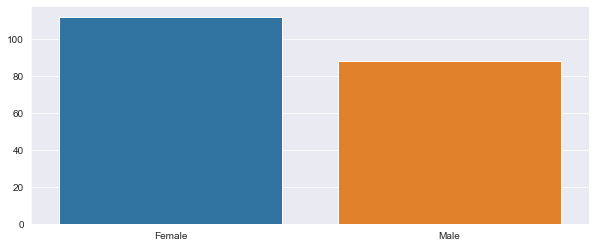

In [11]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

A seguir fiz um gráfico de barras para verificar a distribuição do número de clientes em cada faixa etária. Claramente, a faixa etária de 26 a 35 anos supera qualquer outra faixa etária

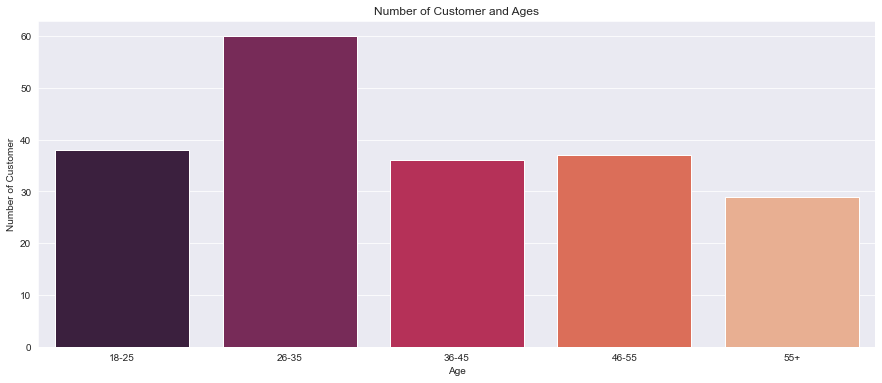

In [13]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Continuei fazendo um gráfico de barras para visualizar o número de clientes de acordo com sua pontuação de gastos. A maioria dos clientes tem pontuação de gastos na faixa de 41 a 60.

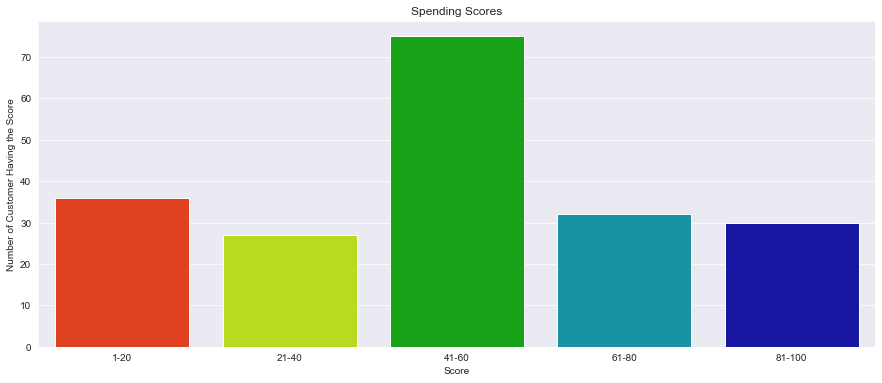

In [14]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Também fiz um gráfico de barras para visualizar o número de clientes de acordo com sua receita anual. A maioria dos clientes tem renda anual na faixa de 60.000 a 90.000.

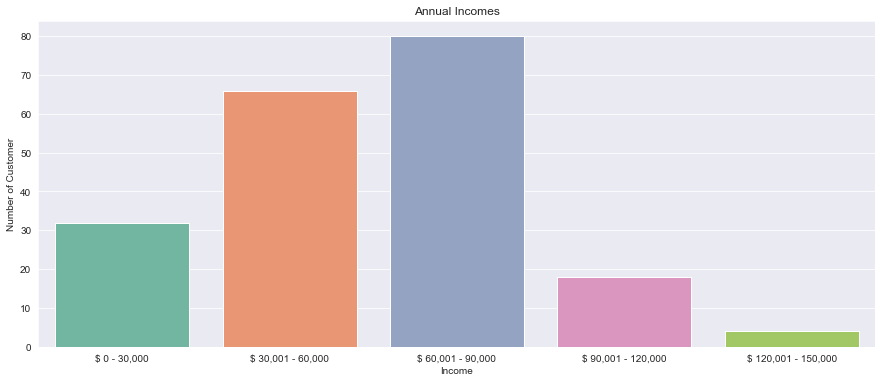

In [15]:

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### Within-Cluster-Sum-of-Squares (WCSS)

**WCSS** é a soma dos quadrados das distâncias de cada ponto de dados em todos os clusters até seus respectivos centróides.

A ideia é minimizar a soma. Suponha que haja n observações em um determinado conjunto de dados e especificamos n número de clusters (k = n), então WCSS se tornará zero, uma vez que os próprios pontos de dados agirão como centróides e a distância será zero e, idealmente, isso forma um cluster perfeito, no entanto, não faz sentido, pois temos tantos clusters quanto as observações. Portanto, existe um valor limite para K que podemos encontrar usando o gráfico do ponto de cotovelo.


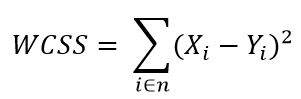

In [18]:
from IPython.display import Image
Image("4_WCSS.png")

### Elbow method

Podemos encontrar o valor ótimo para K usando um gráfico de pontos de cotovelo. Inicializamos aleatoriamente o algoritmo K-Means para um intervalo de valores K e o plotamos em relação ao WCSS para cada valor K.

As etapas podem ser resumidas nas etapas abaixo:

1. Calcule o agrupamento de K-Means para diferentes valores de K variando K de 1 a 10 clusters.
2. Para cada K, calcule a soma total do quadrado dentro do cluster (WCSS).
3. Trace a curva de WCSS vs o número de clusters K.
4. A localização de uma dobra (joelho) no gráfico é geralmente considerada como um indicador do número apropriado de grupos.

In [19]:
df.iloc[:,1:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


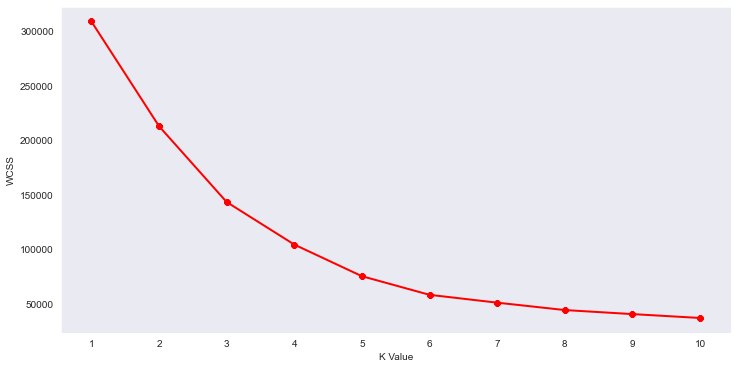

In [20]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### O valor K ideal é 5 usando o método do cotovelo.

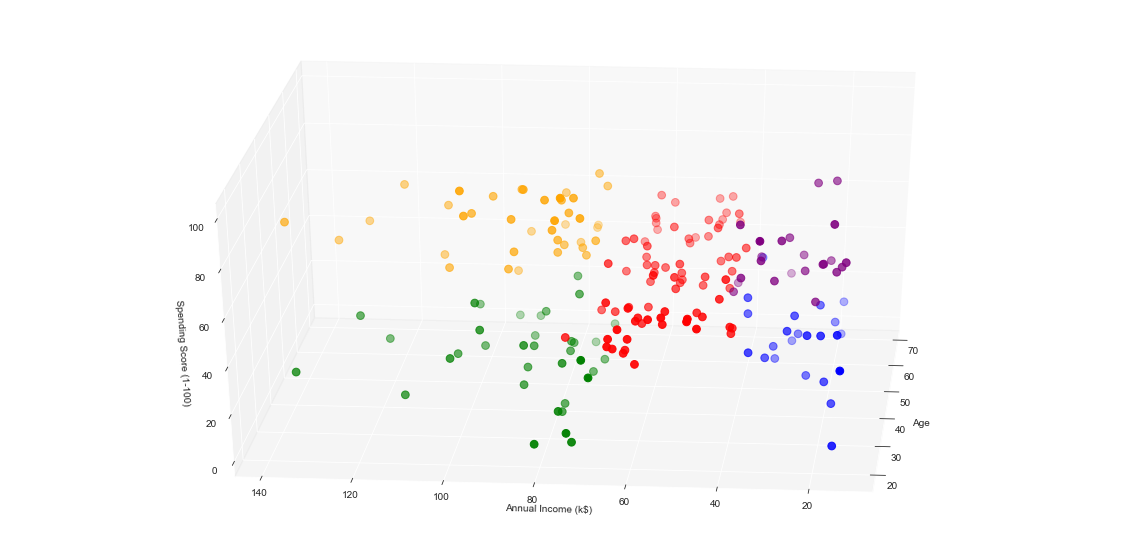

In [28]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
ax.set_facecolor('xkcd:white')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()